# I. Bài tập

Từ một trong các bộ dữ liệu:

* [BreastCancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) về chuẩn đoán ung thư vú. 
* [diabetes](https://archive.ics.uci.edu/ml/datasets/diabetes) chuẩn đoán bệnh tiểu đường.
* [hmeq](https://www.kaggle.com/ajay1735/hmeq-data) phân loại hồ sơ cho vay mua nhà.
* [BonstonHousing](https://github.com/phamdinhkhanh/datasets/blob/master/BostonHousing.csv) dự báo giá nhà ở Bonston. 
* [churn customer](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) dự đoán khách hàng rời bỏ.

Bạn hãy thực hiện các bài tập sau: 

1. Thống kê mô tả và vẽ biểu đồ phân phối trên các trường của tập dữ liệu này. Đánh giá sơ bộ về tính chất phân phối của các biến.

2. Hãy tạo thành một pipeline hoàn chỉnh để xử lý dữ liệu từ thô sang tinh.

3. Phân chia tập train/test và lựa chọn metric cho bài toán.

4. Lựa chọn một lớp mô hình phù hợp, thực hiện cross validation để huấn luyện và đánh giá mô hình đó trên tập train.

5. Triển khai lại quá trình ở bài 4 trên nhiều lớp mô hình khác nhau.

6. Vẽ biểu đồ thể hiện kết quả của các mô hình và kết luận đâu là mô hình tốt nhất. 

7. Dựa vào lớp mô hình tốt nhất được lựa chọn, thực hiện grid search trên không gian tham số của nó.

In [7]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/MLhandson')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
df = pd.read_csv("/content/gdrive/MyDrive/MLhandson/hmeq.csv")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [12]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


Number of numeric fields:  11


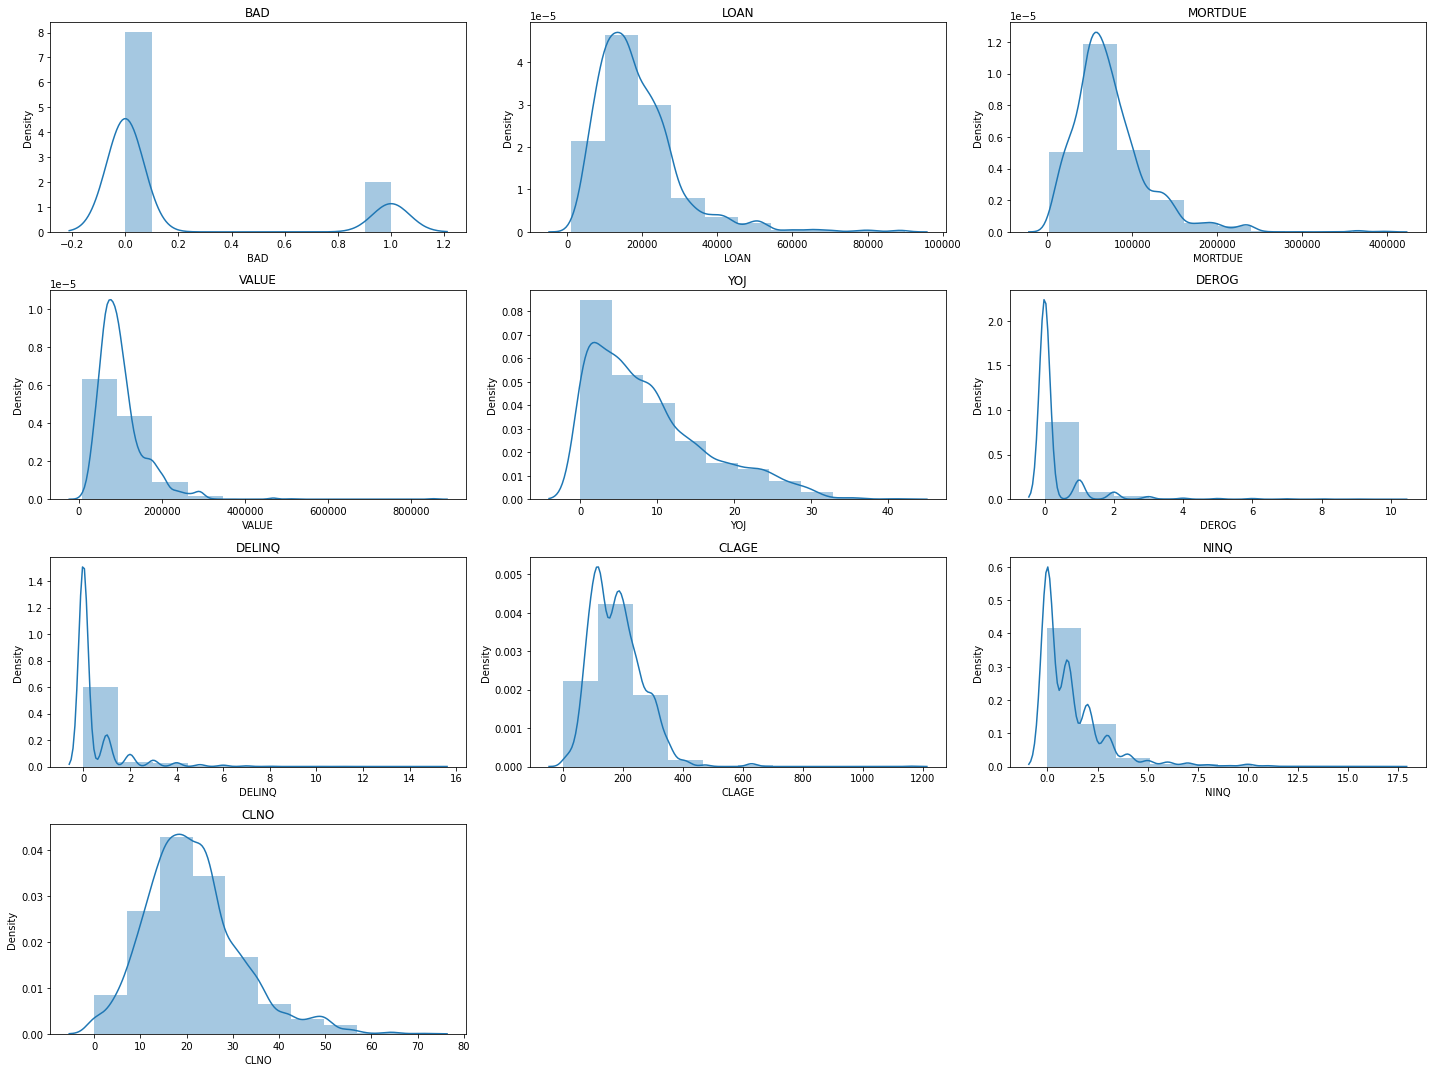

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
                      
numeric_cols = df.select_dtypes(include = ['float', 'int']).columns

def plot_numeric_classes(df, col, bins = 10, hist = True, kde = True):
  sns.distplot(df[col],hist = hist, kde = kde, bins = bins)
 
def distribution_numeric(df, numeric_cols, figsize = (20, 15), row = 4, col = 3): 
  print('Number of numeric fields: ', len(numeric_cols))
  plt.figure(figsize = figsize)
  for i in range(1, len(numeric_cols), 1):
    try:
      plt.subplot(row, col, i)
      plot_numeric_classes(df, numeric_cols[i - 1])
      plt.title(numeric_cols[i - 1])
    except:
      print('Error: {}'.format(numeric_cols[i - 1]))
      break 

distribution_numeric(df, numeric_cols)
plt.tight_layout()

Number of categorical:  2


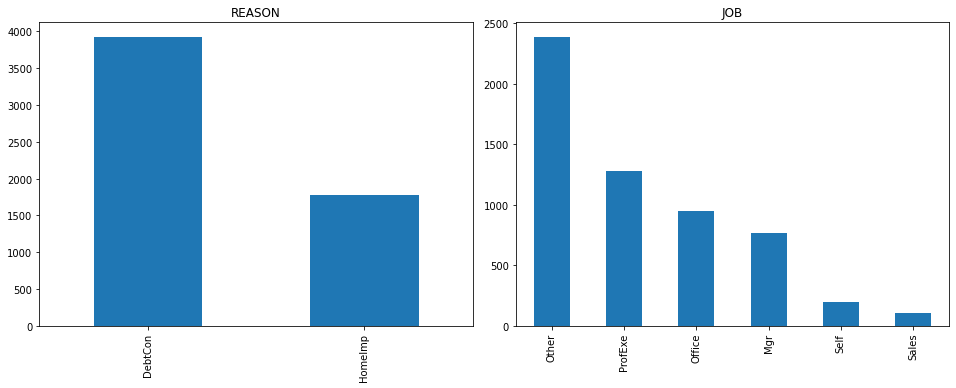

In [15]:
categorical_cols = df.select_dtypes(include = ['O']).columns

def plot_categorical_classes(df, col):
  df[col].value_counts().plot.bar()

def distribution_categorical(df, categorical_cols, row = 3, col = 3, figsize = (20, 15)):
  print('Number of categorical: ', len(categorical_cols))
  plt.figure(figsize = figsize)
  for i in range(1, len(categorical_cols) + 1, 1):
    try:
      plt.subplot(row, col, i)
      plot_categorical_classes(df, categorical_cols[i - 1])
      plt.title(categorical_cols[i - 1])
    except:
      print('Error: {}'.format(categorical_cols[i - 1]))
      break

distribution_categorical(df, categorical_cols)
plt.tight_layout()

In [18]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify = df['BAD'])
X_train = df_train.copy()
y_train = X_train.pop("BAD")

X_test = df_test.copy()
y_test = X_test.pop("BAD")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4768, 12) (4768,)
(1192, 12) (1192,)


In [19]:
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

In [23]:
cat_pl= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), 
        ('onehot', OneHotEncoder()), 
    ]
)

In [24]:
num_pl = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=7)),
           ('scaler', MinMaxScaler()) 
    ]
)

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names), 
        ('cat', cat_pl, cat_names), 
    ]
)

In [26]:
completed_pl = Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
            ("classifier", RandomForestClassifier())
    ]
)


completed_pl.fit(X_train, y_train)


y_train_pred = completed_pl.predict(X_train)
print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

y_pred = completed_pl.predict(X_test)
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on train: 1.00
Accuracy on test: 0.92


In [27]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
import numpy as np
def fbeta(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=np.sqrt(5))

In [28]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

metric = make_scorer(fbeta)

scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)
print('Mean Fbeta: {:.03f} {:.03f}'.format(np.mean(scores), np.std(scores)))

Mean Fbeta: 0.625 0.043


In [29]:
models = [GaussianNB(), LogisticRegression(), KNeighborsClassifier(), MLPClassifier(), RandomForestClassifier()]


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

all_scores = []
for model in models:
  completed_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ('classifier', model)]
  )

  scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)
  all_scores.append(scores)

Text(0.5, 1.0, 'Scores Metrics')

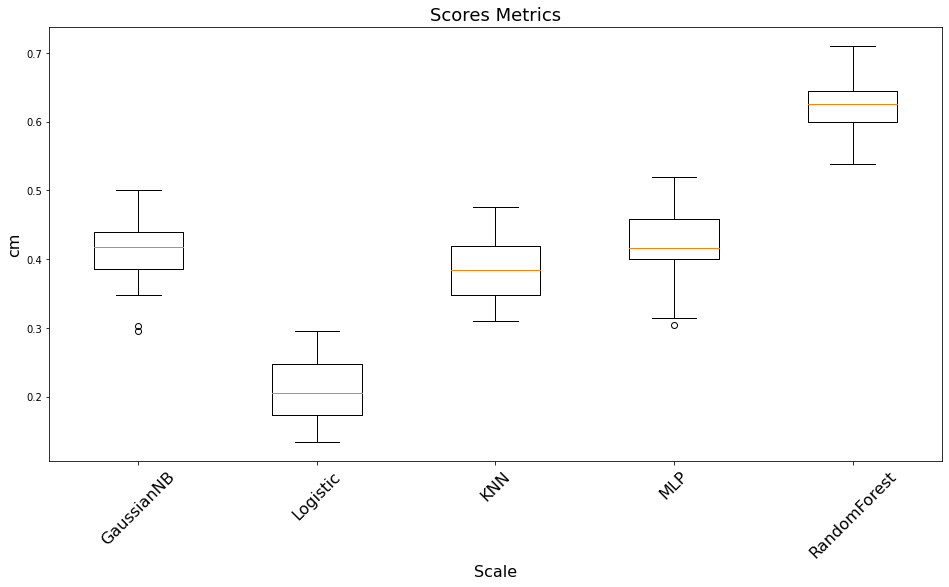

In [30]:
import matplotlib.pyplot as plt
model_names = ['GaussianNB', 'Logistic', 'KNN', 'MLP', 'RandomForest']

# Draw bboxplot 
plt.figure(figsize=(16, 8))
plt.boxplot(all_scores)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=16)
plt.title("Scores Metrics", fontsize=18)

In [31]:
from sklearn.base import BaseEstimator
class ClassifierSwitcher(BaseEstimator):
  def __init__(
      self, 
      estimator = RandomForestClassifier(),
  ):
      
      self.estimator = estimator


  def fit(self, X, y=None, **kwargs):
      self.estimator.fit(X, y)
      return self


  def predict(self, X, y=None):
      return self.estimator.predict(X)


  def predict_proba(self, X):
      return self.estimator.predict_proba(X)


  def score(self, X, y):
      return self.estimator.score(X, y)

In [32]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline(
    steps=[("pre", preprocessor), ("clf", ClassifierSwitcher())]
)

In [33]:
parameters = [
    {
        'clf__estimator': [LogisticRegression()], # SVM if hinge loss / logreg if log loss
        'clf__estimator__penalty': ('l2', 'elasticnet', 'l1'),
        'clf__estimator__max_iter': [50, 80],
        'clf__estimator__tol': [1e-4]
    },
    {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__n_estimators': [50, 100],
        'clf__estimator__max_depth': [5, 10],
        'clf__estimator__criterion': ('gini', 'entropy')
    },
]

In [34]:
metric = make_scorer(fbeta)
gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring=metric, return_train_score=True, error_score=0, verbose=3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "<ipython-input-31-e3897990a9d1>", line 12, in fit
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _

GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7)),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['LOAN',
                                                                          'MORTDUE',
                                                                          'VALUE',
                                                                          'YOJ',
                                                                          'DEROG

In [35]:
gscv.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                           

In [36]:
gscv.best_params_

{'clf__estimator': RandomForestClassifier(max_depth=10),
 'clf__estimator__criterion': 'gini',
 'clf__estimator__max_depth': 10,
 'clf__estimator__n_estimators': 100}

In [37]:
gscv.best_score_

0.4864532721756893